# ConvNet with Tensorflow

Depending the Python version and Tensorflow version there will be version issues to run matplotlib.
If this is de case in your environment, I would advise you to run it on Colab.

In [4]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras import datasets,layers, models

#import matplotlib.pyplot as plt 

In [2]:
#Get the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalizing pixel values to be btw 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

In [ ]:
# Plotting some images from the dataset

classes = ('airplane', 'automobile', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(classes[train_labels[i][0]])
plt.show()

### Model structure

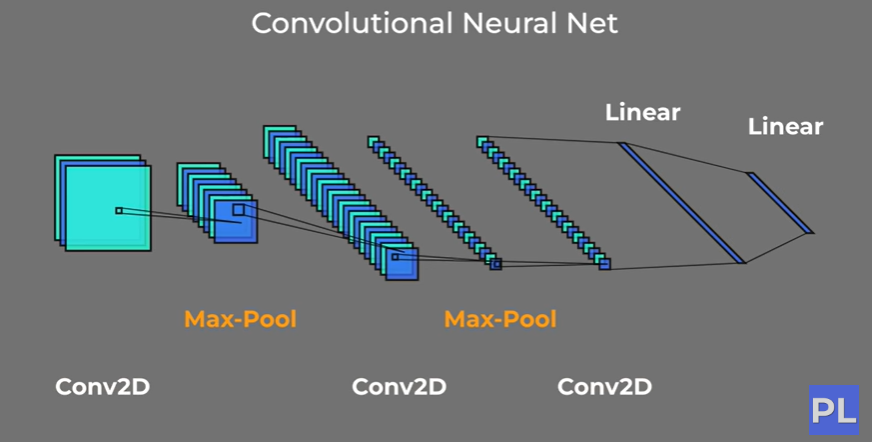

### Model structure in code

In [3]:
# Creating the model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [4]:
#Defining the optimizer and the loss
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
# Training loop
history = model.fit(train_images,train_labels,
                    epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 9s 3ms/step - loss: 1.6040 - accuracy: 0.4153 - val_loss: 1.3310 - val_accuracy: 0.5209
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2426 - accuracy: 0.5549 - val_loss: 1.1926 - val_accuracy: 0.5764
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0965 - accuracy: 0.6114 - val_loss: 1.1199 - val_accuracy: 0.6044
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9926 - accuracy: 0.6516 - val_loss: 1.0377 - val_accuracy: 0.6364
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9102 - accuracy: 0.6776 - val_loss: 0.9902 - val_accuracy: 0.6543
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8480 - accuracy: 0.7010 - val_loss: 0.9075 - val_accuracy: 0.6802
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7914 - accuracy: 0.7230 - val_loss: 0.9249 - val_accuracy:

In [ ]:
#History

plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='uper_right')

In [6]:
#Evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_loss)
print(test_acc)

313/313 - 1s - loss: 0.9766 - accuracy: 0.6828
0.9766150116920471
0.6827999949455261
